<a href="https://colab.research.google.com/github/nandhukumar86/AIML-Practice/blob/master/CNN_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1, 2, 4 are worked out in this same ipynb file

In [10]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-878bf5f5-c433-7c1a-4b92-733f662a3266)


## Basic imports

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf


## Importing data from Google drive

In [12]:
import os
import cv2
import skimage.io as io


In [174]:
folder = '/content/drive/MyDrive/Part-1 - Plant Seedling Classification Data/train'

for f in os.listdir(folder):
  print(f)

Black-grass
Charlock
Cleavers
Common Chickweed
Common wheat
Fat Hen
Loose Silky-bent
Maize
Scentless Mayweed
Shepherds Purse
Small-flowered Cranesbill
Sugar beet


In [183]:
X_train = []
y_train = []

In [184]:
for f in os.listdir(folder):
  currentclassfolder = folder + '/' + f
  print(f)
  i = 0;
  for img in os.listdir(currentclassfolder):
    i = i + 1
    currentimagefile = currentclassfolder + '/' + img
    tempImg = cv2.imread(currentimagefile)
    tempImg = cv2.resize(tempImg,(128,128))
    X_train.append(tempImg)
    y_train.append(f)

Black-grass
Charlock
Cleavers
Common Chickweed
Common wheat
Fat Hen
Loose Silky-bent
Maize
Scentless Mayweed
Shepherds Purse
Small-flowered Cranesbill
Sugar beet


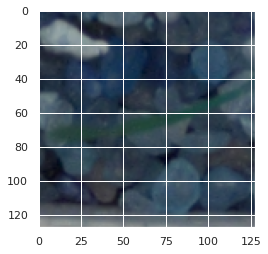

In [185]:
plt.imshow(X_train[45]);

In [186]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [187]:
X_train.shape, y_train.shape

((4767, 128, 128, 3), (4767,))

# Simple CNN


In [189]:
X_train = X_train / 255

In [190]:
import tensorflow as tf


In [191]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

y_train = ohe.fit_transform(y_train.reshape(-1,1)).toarray()


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.30, random_state=100)

In [225]:
tf.keras.backend.clear_session()

In [226]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout



model = Sequential()

model.add(Conv2D(filters=128, kernel_size=2, activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(15, activation='relu'))
model.add(Dense(12, activation='softmax'))

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 127, 127, 128)     1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0

In [227]:
from tensorflow.keras.optimizers import SGD

opt = SGD(learning_rate=0.005, momentum=0.95)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [228]:
y_train.shape

(3336, 12)

In [230]:
# pass callback as property during fit: callbacks=[earlystop]
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

history = model.fit(X_train, y_train, epochs=50, callbacks=[earlystop], batch_size=16, validation_data = (X_test, y_test), verbose=1) 


Epoch 1/50
209/209 [==============================] - 5s 17ms/step - loss: 2.4492 - accuracy: 0.1114 - val_loss: 2.4204 - val_accuracy: 0.1461
Epoch 2/50
209/209 [==============================] - 3s 15ms/step - loss: 2.3949 - accuracy: 0.1595 - val_loss: 2.4001 - val_accuracy: 0.1544
Epoch 3/50
209/209 [==============================] - 3s 15ms/step - loss: 2.2552 - accuracy: 0.2123 - val_loss: 1.7984 - val_accuracy: 0.3864
Epoch 4/50
209/209 [==============================] - 3s 15ms/step - loss: 1.8573 - accuracy: 0.3268 - val_loss: 1.7800 - val_accuracy: 0.4046
Epoch 5/50
209/209 [==============================] - 3s 15ms/step - loss: 1.7191 - accuracy: 0.3953 - val_loss: 1.6913 - val_accuracy: 0.4340
Epoch 6/50
209/209 [==============================] - 3s 15ms/step - loss: 1.6310 - accuracy: 0.4346 - val_loss: 1.5635 - val_accuracy: 0.4668
Epoch 7/50
209/209 [==============================] - 3s 15ms/step - loss: 1.5779 - accuracy: 0.4534 - val_loss: 1.4892 - val_accuracy: 0.4416

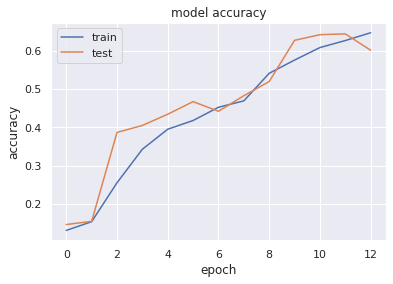

In [231]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [232]:
y_train_predict = model.predict(X_train)


In [236]:
id = np.round(np.random.rand()*1000)
print(y_train_predict[np.int32(id)].argmax())
print(y_train[np.int32(id)].argmax())

6
6


## Using Transfer learning VGG16

In [237]:
from tensorflow.keras.applications import VGG16

In [238]:
tf.keras.backend.clear_session()

In [239]:
basemodel = VGG16(include_top=False, input_shape=(128,128,3))


In [240]:
for l in basemodel.layers:
  l.trainable = False;

In [241]:
from keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from keras.layers import LeakyReLU




# set trainable to False for each layer in basemodel
x = Flatten()(basemodel.layers[-1].output)
x = Dense(36, activation=LeakyReLU(0.05))(x)
x = Dropout(0.2)(x)
x = Dense(12, activation='softmax')(x)

modified_basemodel = Model(inputs=basemodel.input, outputs=x)

In [242]:
modified_basemodel.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [243]:
from tensorflow.keras.optimizers import SGD

opt = SGD(learning_rate=0.01, momentum=0.9)

modified_basemodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# "binary_crossentropy" for binary classification.
# "categorical_crossentropy" for multi-class classification.
# "mse" for regression


In [244]:
# pass callback as property during fit: callbacks=[earlystop]
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)
history = modified_basemodel.fit(X_train, y_train, callbacks=[earlystop], epochs=50, batch_size=32, validation_data = (X_test, y_test)) 


Epoch 1/50
105/105 [==============================] - 7s 65ms/step - loss: 2.2574 - accuracy: 0.2373 - val_loss: 1.6698 - val_accuracy: 0.4382
Epoch 2/50
105/105 [==============================] - 7s 63ms/step - loss: 1.6271 - accuracy: 0.4426 - val_loss: 1.3425 - val_accuracy: 0.5653
Epoch 3/50
105/105 [==============================] - 7s 65ms/step - loss: 1.3055 - accuracy: 0.5535 - val_loss: 1.2151 - val_accuracy: 0.6101
Epoch 4/50
105/105 [==============================] - 7s 66ms/step - loss: 1.1704 - accuracy: 0.6045 - val_loss: 1.1264 - val_accuracy: 0.6317
Epoch 5/50
105/105 [==============================] - 7s 68ms/step - loss: 0.9908 - accuracy: 0.6682 - val_loss: 1.0851 - val_accuracy: 0.6317
Epoch 6/50
105/105 [==============================] - 7s 67ms/step - loss: 0.8739 - accuracy: 0.7074 - val_loss: 1.0055 - val_accuracy: 0.6569
Epoch 7/50
105/105 [==============================] - 7s 66ms/step - loss: 0.7773 - accuracy: 0.7382 - val_loss: 0.9659 - val_accuracy: 0.6765

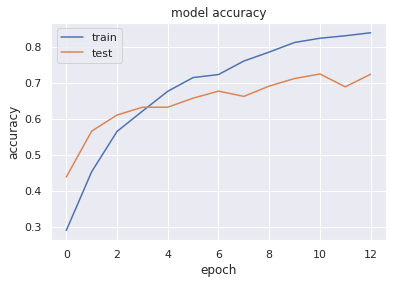

In [245]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [247]:
# y_test_predict = modified_basemodel.predict(X_test)
y_train_predict = modified_basemodel.predict(X_train)



In [249]:
id = np.round(np.random.rand()*1000)
print(y_train_predict[np.int32(id)].argmax())
print(y_train[np.int32(id)].argmax())

6
6


In [250]:
# data = {}

# data['X_train'] = X_train
# data['y_train'] = y_train

In [64]:
# import pickle
# dbfile = open('data', 'ab')
# # source, destination
# pickle.dump(data, dbfile)                     
# dbfile.close()

In [8]:
# dbfile = open('data','rb')
# data = pickle.load(dbfile)

# X_train = data['X_train']
# y_train = data['y_train']

In [9]:
X_train.shape

(4767, 128, 128, 3)

# Comparing both the models, modiefied VGG16 with test accuracy of 83%, validation accuracy of 72%

# The regular CNN with test accuracy of 66% and validation accuracy of 60%

# Since the weights are reused in VGG16, the model performs better.

In [250]:
img = io.imread('/content/drive/MyDrive/Part-1 - Plant Seedling Classification Data/Seedling - Prediction/Predict.png')

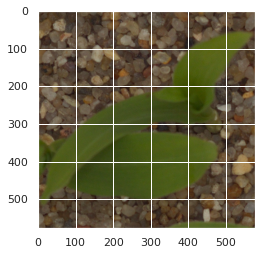

In [251]:
plt.imshow(img);

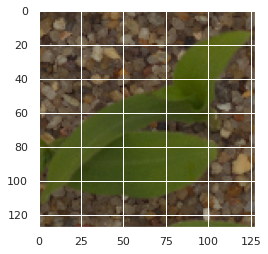

In [252]:
img = cv2.resize(img,(128, 128))
plt.imshow(img);

In [253]:
img = img.reshape(1,128,128,3)


In [254]:
output = modified_basemodel.predict(img)

In [256]:
output.argmax()

7

# Output: Maize Maize Maize!!!

In [257]:
!pip install tensorflowjs

     |████████████████████████████████| 71kB 5.5MB/s 
     |████████████████████████████████| 112kB 11.4MB/s 
  Found existing installation: tensorflow-hub 0.11.0
    Uninstalling tensorflow-hub-0.11.0:
      Successfully uninstalled tensorflow-hub-0.11.0


In [259]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(modified_basemodel, 'tfmodel')

# The Above model will be used in Tensorflow JS to predict the outputs in Angular application.

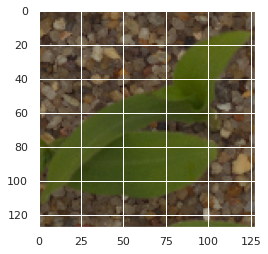

In [269]:
img = img.reshape(128,128,3)
plt.imshow(img);

## Blur image 

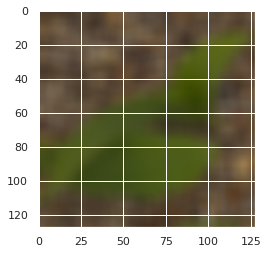

In [272]:

blurKernel = np.ones((10,10))/100
newImg = cv2.filter2D(img, 0, blurKernel)
plt.imshow(newImg);

## Edge detection filter

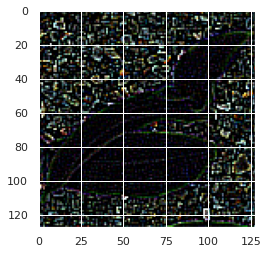

In [276]:
edgeDetectorKernel = np.array([[-2,0,-2],[0,8,0],[-2,0,-2]])
newImg = cv2.filter2D(img, 0, edgeDetectorKernel)
plt.imshow(newImg);

## Smoothing kernal

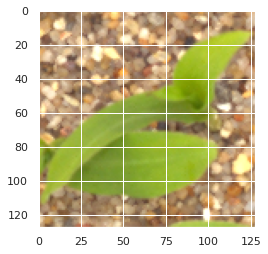

In [279]:
smoothingKernel = np.array([[1,1,1],[1,8,1],[1,1,1]])/8
newImg = cv2.filter2D(img, 0, smoothingKernel)
plt.imshow(newImg);